[출처](https://www.youtube.com/watch?v=lG8pEwvYwCw&list=PL7ZVZgsnLwEEZcVusN-fV_sJhQHq833OS&index=2)

In [1]:
import pandas as pd
import numpy as np

## 시계열 처리

In [2]:
idx = pd.DatetimeIndex(['2019-01-01', '2020-01-01',
                         '2020-02-01', '2020-02-02',
                         '2020-03-01'])
s = pd.Series([0, 1, 2, 3, 4], index=idx)
s

2019-01-01    0
2020-01-01    1
2020-02-01    2
2020-02-02    3
2020-03-01    4
dtype: int64

In [3]:
s['2020-01-01': ]

2020-01-01    1
2020-02-01    2
2020-02-02    3
2020-03-01    4
dtype: int64

In [4]:
s[:'2020-01-01']

2019-01-01    0
2020-01-01    1
dtype: int64

In [5]:
s['2019']

2019-01-01    0
dtype: int64

#### 시계열 데이터 구조


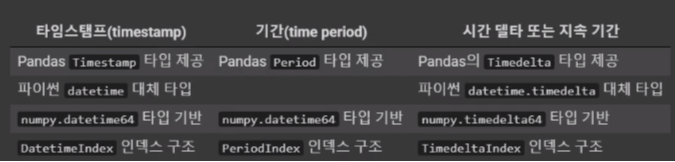

In [7]:
from datetime import datetime
dates = pd.to_datetime(['12-12-2019', datetime(2020, 1, 1), 
                        '2nd of Feb, 2020', '2020-Mar-4', '20200701'])

# 다양한 표현들을 표준으로 변형하게 됨
dates

DatetimeIndex(['2019-12-12', '2020-01-01', '2020-02-02', '2020-03-04',
               '2020-07-01'],
              dtype='datetime64[ns]', freq=None)

In [8]:
dates.to_period('D')

PeriodIndex(['2019-12-12', '2020-01-01', '2020-02-02', '2020-03-04',
             '2020-07-01'],
            dtype='period[D]', freq='D')

In [9]:
dates - dates[0]

TimedeltaIndex(['0 days', '20 days', '52 days', '83 days', '202 days'], dtype='timedelta64[ns]', freq=None)

In [10]:
pd.date_range('2020-01-01', '2020-07-01')

DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-04',
               '2020-01-05', '2020-01-06', '2020-01-07', '2020-01-08',
               '2020-01-09', '2020-01-10',
               ...
               '2020-06-22', '2020-06-23', '2020-06-24', '2020-06-25',
               '2020-06-26', '2020-06-27', '2020-06-28', '2020-06-29',
               '2020-06-30', '2020-07-01'],
              dtype='datetime64[ns]', length=183, freq='D')

In [11]:
pd.date_range('2020-01-01', periods=7)

DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-04',
               '2020-01-05', '2020-01-06', '2020-01-07'],
              dtype='datetime64[ns]', freq='D')

In [13]:
pd.date_range('2020-01-01', periods=7, freq='M')

DatetimeIndex(['2020-01-31', '2020-02-29', '2020-03-31', '2020-04-30',
               '2020-05-31', '2020-06-30', '2020-07-31'],
              dtype='datetime64[ns]', freq='M')

In [14]:
pd.date_range('2020-01-01', periods=7, freq='H')

DatetimeIndex(['2020-01-01 00:00:00', '2020-01-01 01:00:00',
               '2020-01-01 02:00:00', '2020-01-01 03:00:00',
               '2020-01-01 04:00:00', '2020-01-01 05:00:00',
               '2020-01-01 06:00:00'],
              dtype='datetime64[ns]', freq='H')

In [17]:
idx = pd.to_datetime(['2020-01-01 12:00:00', '2020-01-02 00:00:00'] + [None])
idx

DatetimeIndex(['2020-01-01 12:00:00', '2020-01-02 00:00:00', 'NaT'], dtype='datetime64[ns]', freq=None)

Nat : Not a time

In [18]:
idx[2]

NaT

In [19]:
pd.isnull(idx)

array([False, False,  True])

### 시계열 기본

In [21]:
dates = [datetime(2020, 1, 1), datetime(2020, 1, 2), 
         datetime(2020, 1, 4), datetime(2020, 1, 7),
         datetime(2020, 1, 10), datetime(2020, 1, 11),
         datetime(2020, 1, 15)]
dates

[datetime.datetime(2020, 1, 1, 0, 0),
 datetime.datetime(2020, 1, 2, 0, 0),
 datetime.datetime(2020, 1, 4, 0, 0),
 datetime.datetime(2020, 1, 7, 0, 0),
 datetime.datetime(2020, 1, 10, 0, 0),
 datetime.datetime(2020, 1, 11, 0, 0),
 datetime.datetime(2020, 1, 15, 0, 0)]

In [22]:
ts = pd.Series(np.random.randn(7), index=dates)
ts

2020-01-01   -2.280729
2020-01-02   -0.096737
2020-01-04   -0.251321
2020-01-07   -1.760952
2020-01-10    0.175932
2020-01-11   -1.064672
2020-01-15    0.642797
dtype: float64

In [23]:
ts.index

DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-04', '2020-01-07',
               '2020-01-10', '2020-01-11', '2020-01-15'],
              dtype='datetime64[ns]', freq=None)

In [24]:
ts.index[0]

Timestamp('2020-01-01 00:00:00')

In [25]:
ts[ts.index[2]]

-0.25132147186523474

In [26]:
ts['20200104']

-0.25132147186523474

In [27]:
ts['1/4/2020']

-0.25132147186523474

In [28]:
ts = pd.Series(np.random.randn(1000),
               index=pd.date_range('2017-10-01', periods=1000))
ts

2017-10-01    1.277219
2017-10-02   -0.309579
2017-10-03   -0.548072
2017-10-04   -0.080247
2017-10-05    0.118426
                ...   
2020-06-22    0.969055
2020-06-23   -0.929430
2020-06-24   -1.538935
2020-06-25   -0.825239
2020-06-26    0.967120
Freq: D, Length: 1000, dtype: float64

인덱싱이 년, 월, 일 로 가능하다.

In [31]:
ts['2020']

2020-01-01    0.246917
2020-01-02    1.192029
2020-01-03   -0.517853
2020-01-04    0.371183
2020-01-05   -0.367589
                ...   
2020-06-22    0.969055
2020-06-23   -0.929430
2020-06-24   -1.538935
2020-06-25   -0.825239
2020-06-26    0.967120
Freq: D, Length: 178, dtype: float64

In [32]:
ts['2020-06']

2020-06-01    1.036933
2020-06-02   -1.155575
2020-06-03   -1.125964
2020-06-04   -1.434297
2020-06-05   -0.352786
2020-06-06   -0.761669
2020-06-07   -0.231509
2020-06-08   -2.303164
2020-06-09    0.230322
2020-06-10   -2.222433
2020-06-11   -1.239628
2020-06-12   -0.480428
2020-06-13   -0.442911
2020-06-14    0.202089
2020-06-15   -0.010349
2020-06-16   -0.311514
2020-06-17   -0.241336
2020-06-18   -1.110156
2020-06-19   -0.792666
2020-06-20    0.882334
2020-06-21   -1.146100
2020-06-22    0.969055
2020-06-23   -0.929430
2020-06-24   -1.538935
2020-06-25   -0.825239
2020-06-26    0.967120
Freq: D, dtype: float64

In [33]:
ts[datetime(2020, 6, 20):]

2020-06-20    0.882334
2020-06-21   -1.146100
2020-06-22    0.969055
2020-06-23   -0.929430
2020-06-24   -1.538935
2020-06-25   -0.825239
2020-06-26    0.967120
Freq: D, dtype: float64

In [34]:
ts['2020-06-10' : '2020-06-20']

2020-06-10   -2.222433
2020-06-11   -1.239628
2020-06-12   -0.480428
2020-06-13   -0.442911
2020-06-14    0.202089
2020-06-15   -0.010349
2020-06-16   -0.311514
2020-06-17   -0.241336
2020-06-18   -1.110156
2020-06-19   -0.792666
2020-06-20    0.882334
Freq: D, dtype: float64

In [35]:
tdf = pd.DataFrame(np.random.randn(1000, 4),
                   index= pd.date_range('2017-10-01', periods=1000),
                   columns=['A', 'B', 'C', 'D'])
tdf

,A,B,C,D
2017-10-01,-0.035108,0.479789,1.638009,1.215880
2017-10-02,1.336880,-0.281967,-0.558813,0.246441
2017-10-03,0.056430,0.434957,-1.522525,0.799634
2017-10-04,-0.076842,0.445388,0.641867,0.671818
2017-10-05,0.312366,-0.980789,-0.810712,1.023437
...,...,...,...,...
2020-06-22,0.496736,2.128411,0.761696,-0.746919
2020-06-23,1.235728,-2.601685,-1.497033,0.998936
2020-06-24,0.447797,0.853077,-0.686860,0.794169
2020-06-25,0.497772,-0.382135,-1.650675,-1.921614


In [36]:
tdf['2020']

,A,B,C,D
2020-01-01,2.337217,0.382442,0.894830,2.173809
2020-01-02,0.268847,0.830932,0.275795,-1.258225
2020-01-03,1.185041,1.374880,-0.184949,0.942614
2020-01-04,-0.311741,0.028813,0.456825,2.628148
2020-01-05,0.035321,0.969050,-1.534635,-0.663794
...,...,...,...,...
2020-06-22,0.496736,2.128411,0.761696,-0.746919
2020-06-23,1.235728,-2.601685,-1.497033,0.998936
2020-06-24,0.447797,0.853077,-0.686860,0.794169
2020-06-25,0.497772,-0.382135,-1.650675,-1.921614


In [37]:
tdf.loc['2020-06']

,A,B,C,D
2020-06-01,0.255454,0.712636,-0.013218,0.470979
2020-06-02,-0.891602,-0.500831,-0.008935,-0.268624
2020-06-03,0.231657,-0.507932,-0.735072,1.217344
2020-06-04,-0.358919,-0.837448,0.441970,1.226332
2020-06-05,0.463904,-0.836474,-0.957546,-0.749995
2020-06-06,0.598465,0.392028,0.625929,-0.623446
2020-06-07,0.630457,-0.368141,-0.210280,-0.593593
2020-06-08,-0.368883,0.024379,1.026561,0.803143
2020-06-09,0.825792,1.193425,0.911982,1.001389
2020-06-10,0.469027,-0.355626,0.145786,1.538295


In [39]:
tdf['2020-06-20':]

,A,B,C,D
2020-06-20,-1.548874,1.049692,0.237227,-0.505594
2020-06-21,0.184541,1.030221,-0.254187,0.186531
2020-06-22,0.496736,2.128411,0.761696,-0.746919
2020-06-23,1.235728,-2.601685,-1.497033,0.998936
2020-06-24,0.447797,0.853077,-0.686860,0.794169
2020-06-25,0.497772,-0.382135,-1.650675,-1.921614
2020-06-26,0.038989,0.211707,-0.195583,1.422340


In [40]:
tdf['C']

2017-10-01    1.638009
2017-10-02   -0.558813
2017-10-03   -1.522525
2017-10-04    0.641867
2017-10-05   -0.810712
                ...   
2020-06-22    0.761696
2020-06-23   -1.497033
2020-06-24   -0.686860
2020-06-25   -1.650675
2020-06-26   -0.195583
Freq: D, Name: C, Length: 1000, dtype: float64

In [41]:
ts = pd.Series(np.random.randn(10), 
               index=pd.DatetimeIndex(['2020-01-01', '2020-01-01', '2020-01-02', 
                                       '2020-01-02', '2020-01-03','2020-01-04',
                                       '2020-01-05', '2020-01-05', '2020-01-06',
                                       '2020-01-07']))
ts

2020-01-01   -1.323777
2020-01-01    1.791179
2020-01-02   -0.186981
2020-01-02   -1.038030
2020-01-03   -0.681525
2020-01-04    0.312027
2020-01-05    0.666531
2020-01-05   -1.408877
2020-01-06   -0.143352
2020-01-07    0.006780
dtype: float64

In [42]:
ts.index.is_unique

False

In [43]:
ts['2020-01-01']

2020-01-01   -1.323777
2020-01-01    1.791179
dtype: float64

In [45]:
# 인덱스가 중복 되므로 평균값으로 이용
ts.groupby(level=0).mean()

2020-01-01    0.233701
2020-01-02   -0.612506
2020-01-03   -0.681525
2020-01-04    0.312027
2020-01-05   -0.371173
2020-01-06   -0.143352
2020-01-07    0.006780
dtype: float64

In [46]:
pd.date_range('2020-01-01', '2020-07-01')


DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-04',
               '2020-01-05', '2020-01-06', '2020-01-07', '2020-01-08',
               '2020-01-09', '2020-01-10',
               ...
               '2020-06-22', '2020-06-23', '2020-06-24', '2020-06-25',
               '2020-06-26', '2020-06-27', '2020-06-28', '2020-06-29',
               '2020-06-30', '2020-07-01'],
              dtype='datetime64[ns]', length=183, freq='D')

In [47]:
pd.date_range(start='2020-01-01', periods=10)

DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-04',
               '2020-01-05', '2020-01-06', '2020-01-07', '2020-01-08',
               '2020-01-09', '2020-01-10'],
              dtype='datetime64[ns]', freq='D')

In [48]:
pd.date_range(end='2020-07-01', periods=10)

DatetimeIndex(['2020-06-22', '2020-06-23', '2020-06-24', '2020-06-25',
               '2020-06-26', '2020-06-27', '2020-06-28', '2020-06-29',
               '2020-06-30', '2020-07-01'],
              dtype='datetime64[ns]', freq='D')

In [50]:
# B 는 Business day

pd.date_range('2020-07-01', '2020-07-07', freq='B')

DatetimeIndex(['2020-07-01', '2020-07-02', '2020-07-03', '2020-07-06',
               '2020-07-07'],
              dtype='datetime64[ns]', freq='B')

### 주기와 오프셋


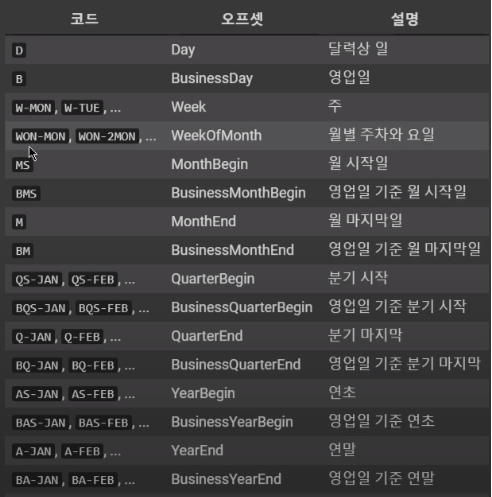

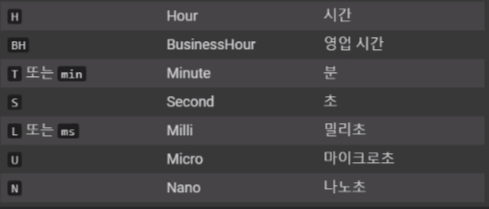

In [51]:
pd.timedelta_range(0, periods=12, freq='H')

TimedeltaIndex(['0 days 00:00:00', '0 days 01:00:00', '0 days 02:00:00',
                '0 days 03:00:00', '0 days 04:00:00', '0 days 05:00:00',
                '0 days 06:00:00', '0 days 07:00:00', '0 days 08:00:00',
                '0 days 09:00:00', '0 days 10:00:00', '0 days 11:00:00'],
               dtype='timedelta64[ns]', freq='H')

In [53]:
pd.timedelta_range(0, periods=60, freq='T')

TimedeltaIndex(['0 days 00:00:00', '0 days 00:01:00', '0 days 00:02:00',
                '0 days 00:03:00', '0 days 00:04:00', '0 days 00:05:00',
                '0 days 00:06:00', '0 days 00:07:00', '0 days 00:08:00',
                '0 days 00:09:00', '0 days 00:10:00', '0 days 00:11:00',
                '0 days 00:12:00', '0 days 00:13:00', '0 days 00:14:00',
                '0 days 00:15:00', '0 days 00:16:00', '0 days 00:17:00',
                '0 days 00:18:00', '0 days 00:19:00', '0 days 00:20:00',
                '0 days 00:21:00', '0 days 00:22:00', '0 days 00:23:00',
                '0 days 00:24:00', '0 days 00:25:00', '0 days 00:26:00',
                '0 days 00:27:00', '0 days 00:28:00', '0 days 00:29:00',
                '0 days 00:30:00', '0 days 00:31:00', '0 days 00:32:00',
                '0 days 00:33:00', '0 days 00:34:00', '0 days 00:35:00',
                '0 days 00:36:00', '0 days 00:37:00', '0 days 00:38:00',
                '0 days 00:39:00', '0 days 00:40:00

In [54]:
pd.timedelta_range(0, periods=10, freq='1H30T')

TimedeltaIndex(['0 days 00:00:00', '0 days 01:30:00', '0 days 03:00:00',
                '0 days 04:30:00', '0 days 06:00:00', '0 days 07:30:00',
                '0 days 09:00:00', '0 days 10:30:00', '0 days 12:00:00',
                '0 days 13:30:00'],
               dtype='timedelta64[ns]', freq='90T')

In [55]:
pd.date_range('2020-01-01', periods=20, freq='B')

DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-06',
               '2020-01-07', '2020-01-08', '2020-01-09', '2020-01-10',
               '2020-01-13', '2020-01-14', '2020-01-15', '2020-01-16',
               '2020-01-17', '2020-01-20', '2020-01-21', '2020-01-22',
               '2020-01-23', '2020-01-24', '2020-01-27', '2020-01-28'],
              dtype='datetime64[ns]', freq='B')

In [56]:
pd.date_range('2020-01-01', periods=30, freq='2H')

DatetimeIndex(['2020-01-01 00:00:00', '2020-01-01 02:00:00',
               '2020-01-01 04:00:00', '2020-01-01 06:00:00',
               '2020-01-01 08:00:00', '2020-01-01 10:00:00',
               '2020-01-01 12:00:00', '2020-01-01 14:00:00',
               '2020-01-01 16:00:00', '2020-01-01 18:00:00',
               '2020-01-01 20:00:00', '2020-01-01 22:00:00',
               '2020-01-02 00:00:00', '2020-01-02 02:00:00',
               '2020-01-02 04:00:00', '2020-01-02 06:00:00',
               '2020-01-02 08:00:00', '2020-01-02 10:00:00',
               '2020-01-02 12:00:00', '2020-01-02 14:00:00',
               '2020-01-02 16:00:00', '2020-01-02 18:00:00',
               '2020-01-02 20:00:00', '2020-01-02 22:00:00',
               '2020-01-03 00:00:00', '2020-01-03 02:00:00',
               '2020-01-03 04:00:00', '2020-01-03 06:00:00',
               '2020-01-03 08:00:00', '2020-01-03 10:00:00'],
              dtype='datetime64[ns]', freq='2H')

In [58]:
pd.date_range('2020-01-01', periods=30, freq='S')

DatetimeIndex(['2020-01-01 00:00:00', '2020-01-01 00:00:01',
               '2020-01-01 00:00:02', '2020-01-01 00:00:03',
               '2020-01-01 00:00:04', '2020-01-01 00:00:05',
               '2020-01-01 00:00:06', '2020-01-01 00:00:07',
               '2020-01-01 00:00:08', '2020-01-01 00:00:09',
               '2020-01-01 00:00:10', '2020-01-01 00:00:11',
               '2020-01-01 00:00:12', '2020-01-01 00:00:13',
               '2020-01-01 00:00:14', '2020-01-01 00:00:15',
               '2020-01-01 00:00:16', '2020-01-01 00:00:17',
               '2020-01-01 00:00:18', '2020-01-01 00:00:19',
               '2020-01-01 00:00:20', '2020-01-01 00:00:21',
               '2020-01-01 00:00:22', '2020-01-01 00:00:23',
               '2020-01-01 00:00:24', '2020-01-01 00:00:25',
               '2020-01-01 00:00:26', '2020-01-01 00:00:27',
               '2020-01-01 00:00:28', '2020-01-01 00:00:29'],
              dtype='datetime64[ns]', freq='S')

### 시프트(Shift)

In [62]:
ts = pd.Series(np.random.randn(5),
               index=pd.date_range('2020-01-01', periods=5, freq='B'))

ts

2020-01-01    0.617488
2020-01-02   -0.316983
2020-01-03    0.848239
2020-01-06    0.701312
2020-01-07   -0.754266
Freq: B, dtype: float64

In [63]:
ts.shift(1)

2020-01-01         NaN
2020-01-02    0.617488
2020-01-03   -0.316983
2020-01-06    0.848239
2020-01-07    0.701312
Freq: B, dtype: float64

In [64]:
ts.shift(3)

2020-01-01         NaN
2020-01-02         NaN
2020-01-03         NaN
2020-01-06    0.617488
2020-01-07   -0.316983
Freq: B, dtype: float64

In [65]:
ts.shift(-2)

2020-01-01    0.848239
2020-01-02    0.701312
2020-01-03   -0.754266
2020-01-06         NaN
2020-01-07         NaN
Freq: B, dtype: float64

In [66]:
ts.shift(3, freq='B')

2020-01-06    0.617488
2020-01-07   -0.316983
2020-01-08    0.848239
2020-01-09    0.701312
2020-01-10   -0.754266
Freq: B, dtype: float64

In [67]:
ts.shift(2, freq='W')

2020-01-12    0.617488
2020-01-12   -0.316983
2020-01-12    0.848239
2020-01-19    0.701312
2020-01-19   -0.754266
dtype: float64

### 시간대 처리

* 국제표준시(Coordinated Universal Time, UTC)를 기준으로 떨어진 거리만큼 오프셋으로 시간대 처리
* 전 세계의 시간대 정보를 모아놓은 올슨 데이터베이스를 활용한 라이브러리인 `pytz` 사용

In [68]:
import pytz
pytz.common_timezones

['Africa/Abidjan', 'Africa/Accra', 'Africa/Addis_Ababa', 'Africa/Algiers', 'Africa/Asmara', 'Africa/Bamako', 'Africa/Bangui', 'Africa/Banjul', 'Africa/Bissau', 'Africa/Blantyre', 'Africa/Brazzaville', 'Africa/Bujumbura', 'Africa/Cairo', 'Africa/Casablanca', 'Africa/Ceuta', 'Africa/Conakry', 'Africa/Dakar', 'Africa/Dar_es_Salaam', 'Africa/Djibouti', 'Africa/Douala', 'Africa/El_Aaiun', 'Africa/Freetown', 'Africa/Gaborone', 'Africa/Harare', 'Africa/Johannesburg', 'Africa/Juba', 'Africa/Kampala', 'Africa/Khartoum', 'Africa/Kigali', 'Africa/Kinshasa', 'Africa/Lagos', 'Africa/Libreville', 'Africa/Lome', 'Africa/Luanda', 'Africa/Lubumbashi', 'Africa/Lusaka', 'Africa/Malabo', 'Africa/Maputo', 'Africa/Maseru', 'Africa/Mbabane', 'Africa/Mogadishu', 'Africa/Monrovia', 'Africa/Nairobi', 'Africa/Ndjamena', 'Africa/Niamey', 'Africa/Nouakchott', 'Africa/Ouagadougou', 'Africa/Porto-Novo', 'Africa/Sao_Tome', 'Africa/Tripoli', 'Africa/Tunis', 'Africa/Windhoek', 'America/Adak', 'America/Anchorage', 'Amer

In [69]:
tz = pytz.timezone('Asia/Seoul')

In [70]:
dinx = pd.date_range('2020-01-01 09:00', periods=7, freq='B')
ts = pd.Series(np.random.randn(len(dinx)), index=dinx)
dinx

DatetimeIndex(['2020-01-01 09:00:00', '2020-01-02 09:00:00',
               '2020-01-03 09:00:00', '2020-01-06 09:00:00',
               '2020-01-07 09:00:00', '2020-01-08 09:00:00',
               '2020-01-09 09:00:00'],
              dtype='datetime64[ns]', freq='B')

In [71]:
pd.date_range('2020-01-01 09:00', periods=7, freq='B', tz='UTC')

DatetimeIndex(['2020-01-01 09:00:00+00:00', '2020-01-02 09:00:00+00:00',
               '2020-01-03 09:00:00+00:00', '2020-01-06 09:00:00+00:00',
               '2020-01-07 09:00:00+00:00', '2020-01-08 09:00:00+00:00',
               '2020-01-09 09:00:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='B')

In [72]:
ts_utc = ts.tz_localize('UTC')
ts_utc

2020-01-01 09:00:00+00:00    0.207641
2020-01-02 09:00:00+00:00   -0.556919
2020-01-03 09:00:00+00:00   -1.568753
2020-01-06 09:00:00+00:00   -1.392572
2020-01-07 09:00:00+00:00   -0.019642
2020-01-08 09:00:00+00:00   -1.466951
2020-01-09 09:00:00+00:00   -1.499612
Freq: B, dtype: float64

In [74]:
ts_utc.index

DatetimeIndex(['2020-01-01 09:00:00+00:00', '2020-01-02 09:00:00+00:00',
               '2020-01-03 09:00:00+00:00', '2020-01-06 09:00:00+00:00',
               '2020-01-07 09:00:00+00:00', '2020-01-08 09:00:00+00:00',
               '2020-01-09 09:00:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='B')

In [75]:
ts_utc.tz_convert('Asia/Seoul')

2020-01-01 18:00:00+09:00    0.207641
2020-01-02 18:00:00+09:00   -0.556919
2020-01-03 18:00:00+09:00   -1.568753
2020-01-06 18:00:00+09:00   -1.392572
2020-01-07 18:00:00+09:00   -0.019642
2020-01-08 18:00:00+09:00   -1.466951
2020-01-09 18:00:00+09:00   -1.499612
Freq: B, dtype: float64

In [76]:
ts_seoul = ts.tz_localize('Asia/Seoul')
ts_seoul

2020-01-01 09:00:00+09:00    0.207641
2020-01-02 09:00:00+09:00   -0.556919
2020-01-03 09:00:00+09:00   -1.568753
2020-01-06 09:00:00+09:00   -1.392572
2020-01-07 09:00:00+09:00   -0.019642
2020-01-08 09:00:00+09:00   -1.466951
2020-01-09 09:00:00+09:00   -1.499612
dtype: float64

In [77]:
ts_seoul.tz_convert('UTC')

2020-01-01 00:00:00+00:00    0.207641
2020-01-02 00:00:00+00:00   -0.556919
2020-01-03 00:00:00+00:00   -1.568753
2020-01-06 00:00:00+00:00   -1.392572
2020-01-07 00:00:00+00:00   -0.019642
2020-01-08 00:00:00+00:00   -1.466951
2020-01-09 00:00:00+00:00   -1.499612
dtype: float64

In [80]:
ts_seoul.tz_convert('Europe/Berlin')

2020-01-01 01:00:00+01:00    0.207641
2020-01-02 01:00:00+01:00   -0.556919
2020-01-03 01:00:00+01:00   -1.568753
2020-01-06 01:00:00+01:00   -1.392572
2020-01-07 01:00:00+01:00   -0.019642
2020-01-08 01:00:00+01:00   -1.466951
2020-01-09 01:00:00+01:00   -1.499612
dtype: float64

In [81]:
ts.index.tz_localize('America/New_York')

DatetimeIndex(['2020-01-01 09:00:00-05:00', '2020-01-02 09:00:00-05:00',
               '2020-01-03 09:00:00-05:00', '2020-01-06 09:00:00-05:00',
               '2020-01-07 09:00:00-05:00', '2020-01-08 09:00:00-05:00',
               '2020-01-09 09:00:00-05:00'],
              dtype='datetime64[ns, America/New_York]', freq=None)

In [82]:
stamp = pd.Timestamp('2020-01-01 12:00')
stamp_utc = stamp.tz_localize('UTC')
stamp_utc

Timestamp('2020-01-01 12:00:00+0000', tz='UTC')

In [83]:
stamp_utc.value

1577880000000000000

In [84]:
stamp_utc.tz_convert('Asia/Seoul')

Timestamp('2020-01-01 21:00:00+0900', tz='Asia/Seoul')

In [85]:
stamp_utc.tz_convert('Asia/Seoul').value

1577880000000000000

In [87]:
stamp_ny = pd.Timestamp('2020-01-01 12:00', tz='America/New_York')
stamp_ny

Timestamp('2020-01-01 12:00:00-0500', tz='America/New_York')

In [88]:
stamp_utc.value

1577880000000000000

In [89]:
stamp_ny.value

1577898000000000000

In [90]:
stamp_utc.tz_convert('Asia/Shanghai')

Timestamp('2020-01-01 20:00:00+0800', tz='Asia/Shanghai')

In [92]:
stamp = pd.Timestamp('2020-01-01 12:00', tz='Asia/Seoul')
stamp

Timestamp('2020-01-01 12:00:00+0900', tz='Asia/Seoul')

In [94]:
from pandas.tseries.offsets import Hour
stamp + Hour()

Timestamp('2020-01-01 13:00:00+0900', tz='Asia/Seoul')

In [95]:
stamp + 3 * Hour()

Timestamp('2020-01-01 15:00:00+0900', tz='Asia/Seoul')

In [96]:
ts_utc

2020-01-01 09:00:00+00:00    0.207641
2020-01-02 09:00:00+00:00   -0.556919
2020-01-03 09:00:00+00:00   -1.568753
2020-01-06 09:00:00+00:00   -1.392572
2020-01-07 09:00:00+00:00   -0.019642
2020-01-08 09:00:00+00:00   -1.466951
2020-01-09 09:00:00+00:00   -1.499612
Freq: B, dtype: float64

In [98]:
ts1 = ts_utc[:5].tz_convert('Europe/Berlin')
ts2 = ts_utc[2:].tz_convert('America/New_York')
ts = ts1 + ts2

In [99]:
ts.index

DatetimeIndex(['2020-01-01 09:00:00+00:00', '2020-01-02 09:00:00+00:00',
               '2020-01-03 09:00:00+00:00', '2020-01-06 09:00:00+00:00',
               '2020-01-07 09:00:00+00:00', '2020-01-08 09:00:00+00:00',
               '2020-01-09 09:00:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='B')

### 기간과 기간 연산

In [101]:
p = pd.Period(2020, freq='A-JAN')
p

Period('2020', 'A-JAN')

In [102]:
p + 2

Period('2022', 'A-JAN')

In [103]:
p - 3

Period('2017', 'A-JAN')

In [105]:
p1 = pd.Period(2010, freq='A-JAN')
p2 = pd.Period(2020, freq='A-JAN')
p2 - p1

<10 * YearEnds: month=1>

In [106]:
pr = pd.period_range('2020-01-01', '2020-06-30', freq='M')

In [107]:
pd.Series(np.random.randn(6), index=pr)

2020-01   -0.615753
2020-02    0.724778
2020-03    0.287591
2020-04    1.621922
2020-05   -0.836699
2020-06    0.346673
Freq: M, dtype: float64

In [108]:
pidx = pd.PeriodIndex(['2020-1', '2020-2', '2020-4'], freq='M')
pidx

PeriodIndex(['2020-01', '2020-02', '2020-04'], dtype='period[M]', freq='M')

In [109]:
p = pd.Period('2020', freq='A-FEB')
p 

Period('2020', 'A-FEB')

In [110]:
p.asfreq('M', how='start')

Period('2019-03', 'M')

In [111]:
p.asfreq('M', how='end')

Period('2020-02', 'M')

In [112]:
p = pd.Period('2020', freq='A-OCT')
p


Period('2020', 'A-OCT')

In [113]:
p.asfreq('M', how='start')

Period('2019-11', 'M')

In [115]:
p.asfreq('M', how='end')

Period('2020-10', 'M')

In [117]:
pr = pd.period_range('2010', '2020', freq='A-JAN')
ts = pd.Series(np.random.randn(len(pr)), index=pr)
ts

2010    0.806808
2011   -0.462547
2012    0.852879
2013    0.834047
2014    0.205280
2015   -0.830128
2016    0.120218
2017    0.343969
2018   -0.073314
2019   -0.467713
2020   -0.838722
Freq: A-JAN, dtype: float64

In [118]:
ts.asfreq('M', how='start')

2009-02    0.806808
2010-02   -0.462547
2011-02    0.852879
2012-02    0.834047
2013-02    0.205280
2014-02   -0.830128
2015-02    0.120218
2016-02    0.343969
2017-02   -0.073314
2018-02   -0.467713
2019-02   -0.838722
Freq: M, dtype: float64

In [120]:
ts.asfreq('B', how='end')

2010-01-29    0.806808
2011-01-31   -0.462547
2012-01-31    0.852879
2013-01-31    0.834047
2014-01-31    0.205280
2015-01-30   -0.830128
2016-01-29    0.120218
2017-01-31    0.343969
2018-01-31   -0.073314
2019-01-31   -0.467713
2020-01-31   -0.838722
Freq: B, dtype: float64

In [122]:
p = pd.Period('2020Q2', freq='Q-JAN')
p 

Period('2020Q2', 'Q-JAN')

In [123]:
p.asfreq('D', 'start')

Period('2019-05-01', 'D')

In [124]:
p.asfreq('D', 'end')

Period('2019-07-31', 'D')

In [125]:
pr = pd.period_range('2019Q3', '2020Q3', freq='Q-JAN')
ts = pd.Series(np.arange(len(pr)), index=pr)
ts

2019Q3    0
2019Q4    1
2020Q1    2
2020Q2    3
2020Q3    4
Freq: Q-JAN, dtype: int32

In [128]:
pr = pd.date_range('2020-01-01',periods=5, freq='Q-JAN')
ts = pd.Series(np.arange(len(pr)), index=pr)
ts

2020-01-31    0
2020-04-30    1
2020-07-31    2
2020-10-31    3
2021-01-31    4
Freq: Q-JAN, dtype: int32

In [129]:
ts.to_period()

2020Q4    0
2021Q1    1
2021Q2    2
2021Q3    3
2021Q4    4
Freq: Q-JAN, dtype: int32

In [130]:
pr = pd.date_range('2020-01-01', periods=5, freq='D')
ts = pd.Series(np.random.randn(5), index=pr)
ts

2020-01-01    0.451696
2020-01-02   -0.051407
2020-01-03    0.232051
2020-01-04    1.404351
2020-01-05   -0.292047
Freq: D, dtype: float64

In [131]:
p = ts.to_period('M')
p

2020-01    0.451696
2020-01   -0.051407
2020-01    0.232051
2020-01    1.404351
2020-01   -0.292047
Freq: M, dtype: float64

In [132]:
p.to_timestamp(how='start')

2020-01-01    0.451696
2020-01-01   -0.051407
2020-01-01    0.232051
2020-01-01    1.404351
2020-01-01   -0.292047
dtype: float64

### 리샘플링(Resampling)

* 리샘플링(Resampling): 시계열의 빈도 변환
* 다운샘플링(Down sampling): 상위 빈도 데이터를 하위 빈도 데이터로 집계
* 업샘플링(Up sampling): 하위 빈도 데이터를 상위 빈도 데이터로 집계

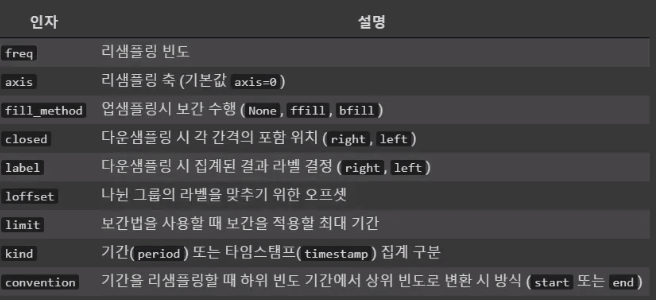

In [133]:
3:51:18

SyntaxError: invalid syntax (<ipython-input-133-2eebbab00ba3>, line 1)

### 무빙 윈도우(Moving Window)

## 참고문헌

* Pandas 사이트: https://pandas.pydata.org/
* Jake VanderPlas, "Python Data Science Handbook", O'Reilly
* Wes Mckinney, "Python for Data Analysis", O'Reilly